## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import os, sys
sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))

/Users/Tony/Other Docs/distilling-and-forgetting-in-large-pre-trained-models


In [3]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="ticks")

OUTPUT_DIR = Path("notebooks/outputs/ewc/")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

## Load data

In [22]:
ewc_hpt_filepath = "notebooks/data/ewc_preserve_all/ewc_preserve_all_wer_wrt_lambda.csv"
df_ewc = pd.read_csv(ewc_hpt_filepath)
df_ewc["lambda"] = df_ewc["lambda"].astype('category')
df_ewc

,lambda,WER AMI (%),WER MLS French (%)
0,0.0001,22.51,48.87
1,0.0010,25.87,41.13
2,0.0100,26.47,40.41
3,0.1000,27.67,39.62
4,1.0000,27.15,38.55


In [8]:
finetune_forgetting_filepath = "notebooks/data/ewc_preserve_all/finetune_forgetting.csv"
df_vanilla = pd.read_csv(finetune_forgetting_filepath)
df_vanilla

,steps,WER AMI (%),WER MLS French (%)
0,0,27.73,37.27
1,600,24.00,41.78
2,1200,22.49,46.15
3,1800,23.13,50.57
4,2400,21.29,52.42
5,3000,20.59,59.93


In [9]:
x_col = "WER AMI (%)"
y_col = "WER MLS French (%)"

<Axes: xlabel='WER AMI (%)', ylabel='WER MLS French (%)'>

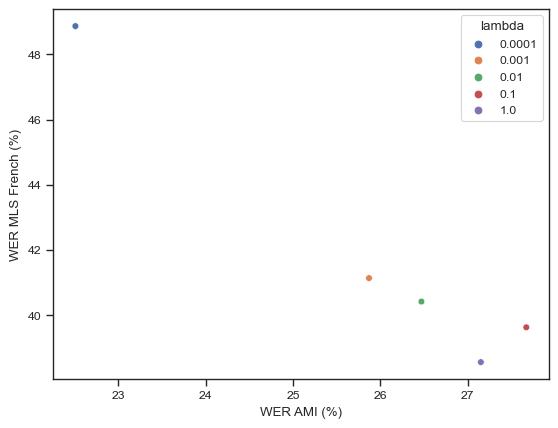

In [23]:
sns.scatterplot(data=df_ewc, x=x_col, y=y_col, hue="lambda")

<Axes: xlabel='WER AMI (%)', ylabel='WER MLS French (%)'>

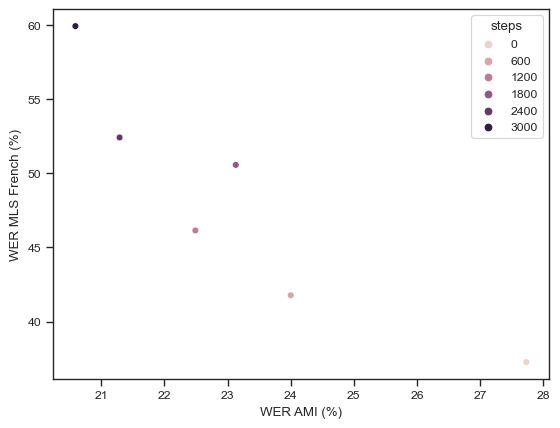

In [24]:
sns.scatterplot(data=df_vanilla, x=x_col, y=y_col, hue="steps")

Figure saved at `notebooks/outputs/ewc/ewc_preserve_all-pairplot.png`.


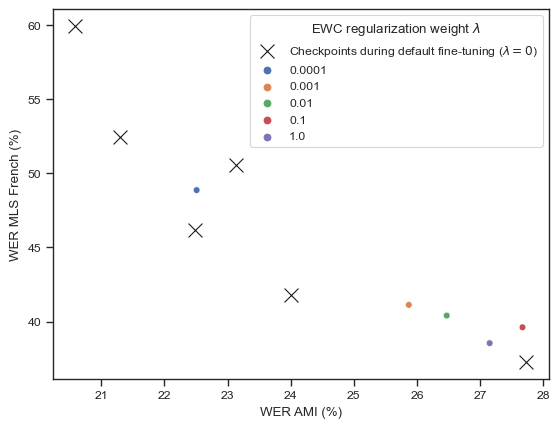

In [51]:
sns.scatterplot(data=df_vanilla, x=x_col, y=y_col, marker="x", s=100, color="k", label=r"Checkpoints during default fine-tuning ($\lambda = 0$)")
sns.scatterplot(data=df_ewc, x=x_col, y=y_col, hue="lambda")
plt.legend(title=r"EWC regularization weight $\lambda$")

savepath = OUTPUT_DIR / "ewc_preserve_all-pairplot.png"
savepath.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(savepath)
print(f"Figure saved at `{savepath}`.")

In [38]:
df_all = pd.concat([df_ewc, df_vanilla])
df_all

,lambda,WER AMI (%),WER MLS French (%),steps
0,0.0001,22.51,48.87,NaN
1,0.0010,25.87,41.13,NaN
2,0.0100,26.47,40.41,NaN
3,0.1000,27.67,39.62,NaN
4,1.0000,27.15,38.55,NaN
0,NaN,27.73,37.27,0.0
1,NaN,24.00,41.78,600.0
2,NaN,22.49,46.15,1200.0
3,NaN,23.13,50.57,1800.0
4,NaN,21.29,52.42,2400.0


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Fit a linear regression model
model = LinearRegression().fit(df[[x_col]], df[y_col])

# Calculate the R-squared coefficient
y_pred = model.predict(df[[x_col]])
r2 = r2_score(df[y_col], y_pred)

print("R-squared coefficient:", r2)

R-squared coefficient: 0.9544377204780928
